$$\require{mhchem}$$

# In class assignment (6 pts)

Complete the in-class assignment that you started in class on Wednesday. Since the solutions are already available, this will simply be graded for completeness. 

 We have a liquid feed of A and B, with concentration of A 2M and concentration of B 3M, with a total flow rate of 0.1 m$^3$/s.  We are looking to optimize the conversion of the reaction: 
\begin{align*}
\ce{A + 2B -> C}
\end{align*}
You can assume in all cases the reaction is isothermal and the volume does not change with changes in the molar flow rates of the reactants.  The reaction is elementary and the rate constant is $k_1=0.1 dm^6/mol^2/s$



## First, find the maximum extent of reaction $\xi^{max}$ and write the rate equation $r$. 

In [32]:
import numpy as np
Alpha_In = np.array([-1, -2])
C0_In = np.array([2, 3])
a = min(-C0_In / Alpha_In)
print('The maximum extent is', a, 'M.')

The maximum extent is 1.5 M.


Since it is an elementary rate equation, 
<center>$r = k_1C_AC_B^2 $

## Now, find the extent of reaction for a steady state 100 L CSTR with the feed and flow rate from above.
<img src="E1P1B.png" alt="Drawing" style="width: 300px;"/>


In [33]:
import numpy as np
from scipy.optimize import fsolve


Alpha = np.array([-1, -2, 1])
C0 = np.array([2, 3, 0])         # M
k1 = 0.1 # dm^6/mol^2/s
v = 100  # dm^3/s
F0 = v * (C0[0] + C0[1] + C0[2])
V = 100  # L

def CSTR(Xi):
    C = C0 + Alpha * Xi
    Ft = v * (C[0] + C[1] + C[2])
    r = k1 * C[0] * C[1]**2
    return F0 + r * V * (Alpha[0] + Alpha[1] + Alpha[2]) - Ft 

guess = 1
sol, = fsolve(CSTR, guess)
print('The extent of the reaction for a 100L CSTR is:', f'{sol:1.3f}', 'M.')


The extent of the reaction for a 100L CSTR is: 0.539 M.


## Find the final extent of reaction for a 100 L PFR
<img src="E1P1C.png" alt="Drawing" style="width: 300px;"/>


In [34]:
import numpy as np
from scipy.integrate import odeint

Alpha = np.array([-1, -2, 1])
C0 = np.array([2, 3, 0])         # M
k1 = 0.1 # dm^6/mol^2/s
v = 100  # dm^3/s
F0 = v * (C0[0] + C0[1] + C0[2])
V = 100  # L

#dF/dV = r
Vol = np.linspace(0, 100)
Xi0 = np.array(0)

def PFR(Xi, V):
    C = C0 + Alpha * Xi
    r = k1 * C[0] * C[1]**2
    dXidV = r / (v * -Alpha[0])    # for A
    return dXidV

sol2 = odeint(PFR, y0 = Xi0, t = Vol)
Xi_out = sol2[-1, 0]

print(f'The final extent of the reaction across the PFR is {Xi_out:1.3f} M.')

The final extent of the reaction across the PFR is 0.720 M.


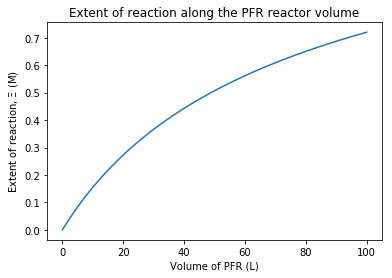

In [46]:
import matplotlib.pyplot as plt
plt.plot(Vol, sol2)
plt.ylabel('Extent of reaction, $\Xi$ (M)')
plt.xlabel('Volume of PFR (L)')
plt.title('Extent of reaction along the PFR reactor volume')
plt.show()

## Our operators tell us that they really like working with CSTR's and suggest that you use several CSTR's in series.  The total volume of CSTR's should equal 100 L.  For example, if you have 4 CSTR's, then  each will have a volume of 25 L.  The outflow of each CSTR is the same as the inflow to the next CSTR.  The extent of reaction for each reactor can be solved based on the extent of reaction from the previous reactor (sequentially).  Calculate the extent of reaction for the four reactor situation. 
<img src="E1P1D.png" alt="Drawing" style="width: 500px;"/>


In [36]:
import numpy as np
from scipy.optimize import fsolve

k1 = 0.1 # dm^6/mol^2/s
v = 100  # dm^3/s

def N_CSTR(N):
    V = 100 / N  # L
    C0 = np.array([2, 3, 0])         # M
    F0 = v * (C0[0] + C0[1] + C0[2])
    Alpha = np.array([-1, -2, 1])
    a= []

    
    for i in range(N):

        def CSTR(Xi_o):
            C = C0 + Alpha * Xi_o
            Ft = v * (C[0] + C[1] + C[2])
            r = k1 * C[0] * C[1]**2
            return F0 + r * V * (Alpha[0] + Alpha[1] + Alpha[2]) - Ft 

        Xi_i, = fsolve(CSTR, 0.2)
        C0 = C0 + Alpha * float(Xi_i)
        F0 = (v * C0).sum()
        a.append(Xi_i)
        print(f'After CSTR {1 + i} the extent of reaction was: {Xi_i:1.4f} M \
and the concentrations of A,B & C are {C0[0]:1.3f}M, {C0[1]:1.3f}M,\
 {C0[2]:1.3f}M.')
        Xi_total = np.sum(a)
    print(f'The final extent of reaction is {Xi_total:1.4f} M.')

In [37]:
N_CSTR(4)

After CSTR 1 the extent of reaction was: 0.2648 M and the concentrations of A,B & C are 1.735M, 2.470M, 0.265M.
After CSTR 2 the extent of reaction was: 0.1753 M and the concentrations of A,B & C are 1.560M, 2.120M, 0.440M.
After CSTR 3 the extent of reaction was: 0.1253 M and the concentrations of A,B & C are 1.435M, 1.869M, 0.565M.
After CSTR 4 the extent of reaction was: 0.0946 M and the concentrations of A,B & C are 1.340M, 1.680M, 0.660M.
The final extent of reaction is 0.6599 M.


## Plot the final extent of reaction for this approach from 1 to 10 reactors, and compare to the conversions from the CSTR and PFR examples above.

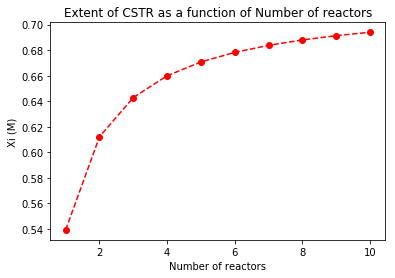

In [38]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

k1 = 0.1 # dm^6/mol^2/s
v = 100  # dm^3/s

def N_CSTR(N):
    V = 100 / N  # L
    C0 = np.array([2, 3, 0])         # M
    F0 = v * (C0[0] + C0[1] + C0[2])
    Alpha = np.array([-1, -2, 1])
    a= []

    
    for i in range(N):

        def CSTR(Xi_o):
            C = C0 + Alpha * Xi_o
            Ft = v * (C[0] + C[1] + C[2])
            r = k1 * C[0] * C[1]**2
            return F0 + r * V * (Alpha[0] + Alpha[1] + Alpha[2]) - Ft 

        Xi_i, = fsolve(CSTR, 0.2)
        C0 = C0 + Alpha * float(Xi_i)
        F0 = (v * C0).sum()
        a.append(Xi_i)
        Xi_total = np.sum(a)

    return Xi_total

n_cstr = []
n = []
for N in range(1,11):
    n_cstr.append(N_CSTR(N))
    n.append(N)

plt.plot(n,n_cstr, 'ro--')
plt.title('Extent of CSTR as a function of Number of reactors')
plt.xlabel('Number of reactors')
plt.ylabel('Xi (M)')
plt.show()

As the number of reactors (N) in series increase, the extent of reaction increases and tends towards the extent by PFR (for same total volume of reactor).
Thus, as PFR acts like infinite CSTRs in series, on increasing N we get higher extent of reaction.

## We are considering adding a membrane to the PFR.  We have a few options.  For each, answer qualitatively if you think the conversion of A would increase, decrease, or stay the same, and why: 
- A membrane that allows A to be added slowly through the side of the PFR (w/ pure B inlet), total molar flow rate of A & B the same
- A membrane that allows B to be added slowly through the side of the PFR (w/ pure A inlet), total molar flow rate of A & B the same
- A membrane that allows C to be removed continuously through the side of the PFR

1. **Decreases**:
The original PFR has high initial rate of reaction owing to presence of both A and B. But, on using a membrane, the rate is lower across the reactor since A is added in intermittently and acts like a limiting reagent. Looking back at rate equation; 
<center>$r = k_1C_AC_B^2 $

The $C_A$ term is lower and hence the lower rate.

2. **Decreases**:
Like the previous case, here B is added in limiting amounts and the rate doesn't increase as much as in the original PFR.

*Using membrane based system would cause lower rates even if same amount of reactants are added in total. But these are used when dealing with highly exothermic/ endothermic reactions or if excess of reactant might perform side reactions.*

3. **Stays the same**:
Since the reaction carried out doesn't have any equilibrium and can go only in forward direction, removal of C doesn't impact the kinetics.

# Science/python questions (2 pts)

There were some good questions during the in-class assignment on Wednesday. Post one question on Piazza on either reaction engineering or python questions.

# PFR with changing number of moles (12 pts)

## Consider the reaction $\ce{2A ->[k_1] 4B ->[k_2] C}$ in a 5 L PFR. Both reactions are elementary, $k_1=5$[1/M/min], $k_2=1000$[1/M$^3$/min] The inlet flow rate is 100% A at 10 bar and 500K. The initial flow rate is 1 [L/min]. Assume the reactor is isothermal and isobaric, and all gases are ideal. Solve and plot the molar flow rates of each species. 

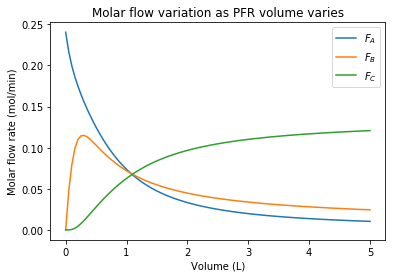

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

k1 = 5 # 1/M/min
k2 = 1000 # 1/M^3/min
v0 = 1 # L/min
R = 0.08205 # L.atm/mol-K
T = 500 # K
P0 = 9.863 # atm   
CA0 = P0 / (R * T)
C0 = [CA0, 0, 0]
Alpha = [2, 4, 1]
F0 = C0 * v0
teval = np.linspace(0, 5, 100)
    
def dFdV(V, F):
    Fa, Fb, Fc = F
    v = v0 * sum(F)/sum(F0)
    Ca = Fa / v
    Cb = Fb / v
    dFadV = (-k1 * Ca**2)* Alpha[0]
    dFbdV = (k1 * Ca**2 - k2 * Cb**4)* Alpha[1]
    dFcdV = (k2 * Cb**4 / v) * Alpha[2]
    return [dFadV, dFbdV, dFcdV]

pfrsol = solve_ivp(dFdV, t_span = (0, 5), y0 = F0, t_eval = teval) 

Fa = pfrsol.y[0,:]
Fb = pfrsol.y[1,:]
Fc = pfrsol.y[2, :]
Ft = Fa + Fb + Fc
v = v0 * Ft/np.sum(F0)

#dCdt(3, [1, 2,3])
plt.plot(pfrsol.t, Fa.T, label = '$F_A$')
plt.plot(pfrsol.t, Fb.T, label = '$F_B$')
plt.plot(pfrsol.t, Fc.T, label = '$F_C$')
plt.xlabel('Volume (L)')
plt.ylabel('Molar flow rate (mol/min)')
plt.title('Molar flow variation as PFR volume varies')
plt.legend(loc = 'best')
plt.show()

## Plot the volumetric flow rate along the length of the reactor.

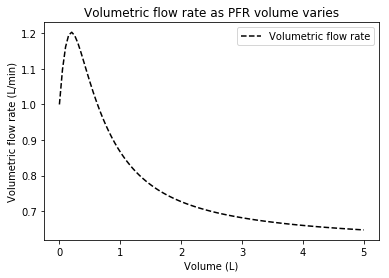

In [40]:
import matplotlib.pyplot as plt
plt.plot(pfrsol.t, v.T, '--k', label = 'Volumetric flow rate')
plt.xlabel('Volume (L)')
plt.ylabel('Volumetric flow rate (L/min)')
plt.title('Volumetric flow rate as PFR volume varies')
plt.legend(loc = 'best')
plt.show()

## Bonus (1 pt) Plot both 3.1 and 3.2 on the same graph, with molar flow rates on the left axis and the flow rate on the y-axis. Hint: one way to do this, among several, is https://matplotlib.org/examples/api/two_scales.html)

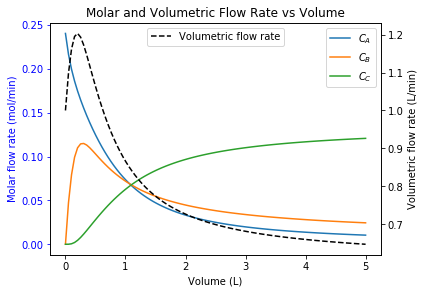

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(pfrsol.t, Fa.T, label = '$C_A$')
ax1.plot(pfrsol.t, Fb.T, label = '$C_B$')
ax1.plot(pfrsol.t, Fc.T, label = '$C_C$')
ax1.set_xlabel('Volume (L)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Molar flow rate (mol/min)', color='b')
ax1.tick_params('y', colors='b')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(pfrsol.t,  v.T, '--k', label = 'Volumetric flow rate')
ax2.set_ylabel('Volumetric flow rate (L/min)', color='k')
ax2.tick_params('y', colors='k')

plt.legend(loc= 'upper center')
fig.tight_layout()
plt.title('Molar and Volumetric Flow Rate vs Volume')
plt.show()

## Read through the rest of the lecture from Wednesday. Assuming the reactor is isothermal but has a pressure drop from a packed bed and $\alpha=0.2$[1/L], redo the calculations for the flow rates, volumetric flow rate, and pressure

[0.24041438147471053, 0, 0, 1]


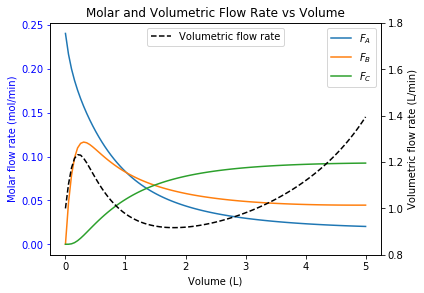

In [51]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

k1 = 5  # 1/M/min
k2 = 1000  # 1/M^3/min
v0 = 1  # L/min
R = 0.08205  # L.atm/mol-K
T = 500  # K
P0 = 9.863  # atm
CA0 = P0 / (R * T)
C0 = [CA0, 0, 0]
Alpha = 0.2  # 1/L
y0 = [1]
F0 = C0 * v0
Y0 = F0 + y0
print(Y0)
teval = np.linspace(0, 5, 100)

def dFdV(V, Y):
    Fa, Fb, Fc, y = Y
    Ft = Fa + Fb + Fc
    P = P0 * (y / 1)
    v = 1 * Ft/sum(F0) * (1/y)
    Ca = Fa / v
    Cb = Fb / v
    dFadV = (-k1 * Ca**2) * 2
    dFbdV = (k1 * Ca**2 - k2 * Cb**4) * 4
    dFcdV = (k2 * Cb**4 / v) * 1
    dydV = -(Alpha / (2 * y)) * Ft / sum(F0)
    return [dFadV, dFbdV, dFcdV, dydV]


pfrsol2 = solve_ivp(dFdV, t_span=(0, 5), y0=Y0, t_eval=teval)  
FA = pfrsol2.y[0, :]
FB = pfrsol2.y[1, :]
FC = pfrsol2.y[2, :]
y = pfrsol2.y[3, :]
Ft = Fa + Fb + Fc
v = v0 * Ft/np.sum(F0) * (1 / y)
Ca = FA/v
Cb = FB/v
Cc = FC/v

#Plot
fig, ax1 = plt.subplots()
ax1.plot(pfrsol2.t, FA.T, label = '$F_A$')
ax1.plot(pfrsol2.t, FB.T, label = '$F_B$')
ax1.plot(pfrsol2.t, FC.T, label = '$F_C$')
ax1.set_xlabel('Volume (L)')
ax1.set_ylabel('Molar flow rate (mol/min)', color='b')
ax1.tick_params('y', colors='b')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(pfrsol2.t,  v.T, '--k', label = 'Volumetric flow rate')
ax2.set_ylabel('Volumetric flow rate (L/min)', color='k')
ax2.tick_params('y', colors='k')
plt.legend(loc= 'upper center')
fig.tight_layout()
plt.title('Molar and Volumetric Flow Rate vs Volume')
plt.ylim(0.8, 1.8)
plt.show()

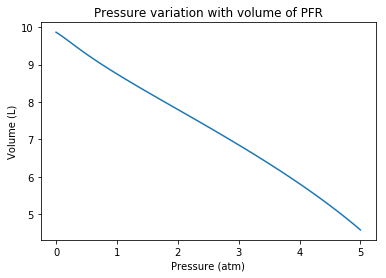

In [43]:
import matplotlib.pyplot as plt

#Pressure graph

plt.plot(pfrsol2.t, y * P0)
plt.xlabel('Pressure (atm)')
plt.ylabel('Volume (L)')
plt.title('Pressure variation with volume of PFR')
plt.show()

## Make a plot compare the molar flow rate profile for C with and without the pressure drop.

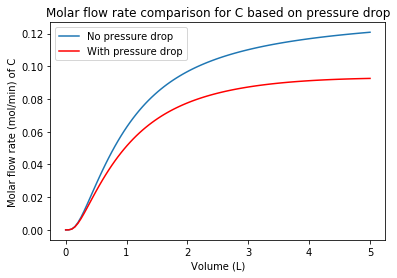

Thus, we get lower flow rate of C on accounting pressure drop.


In [52]:
import matplotlib.pyplot as plt

plt.plot(pfrsol.t, Fc.T, label = 'No pressure drop')
plt.plot(pfrsol2.t, FC.T, 'r-', label = 'With pressure drop')
plt.xlabel('Volume (L)')
plt.ylabel('Molar flow rate (mol/min) of C')
plt.title('Molar flow rate comparison for C based on pressure drop')
plt.legend()
plt.show()

print('Thus, we get lower flow rate of C on accounting pressure drop.')